# cnn on MNIST data set

In [0]:
# Importing few libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
# Keras libraries

import keras
from keras import backend as K
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.initializers import RandomNormal
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

Using TensorFlow backend.


In [3]:
# Loading MNIST dataset
mn = mnist.load_data()

print("MNIST dataset/n")
mn

11493376/11490434 [==============================] - 0s 0us/step
MNIST dataset/n


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
# Splitting MNIST dataset into train and test

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [6]:
print(x_test.shape)
print(y_test.shape)



(10000, 28, 28)
(10000,)


In [7]:
print(x_train.shape[0])
print(x_test.shape[0])



60000
10000


In [8]:
print((x_train.shape[1], x_train.shape[2]))
print((x_test.shape[1], x_test.shape[2]))

(28, 28)
(28, 28)


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape, '\n')

print('*'*30, '\n')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1) 

****************************** 

60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_la(x, vy, ty, ax, t, colors=['b']):
  
  if t == 'loss':
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.title("Epoch vs Loss")
    plt.legend()
    plt.grid()
  
  if t == 'acc':
    ax.plot(x, vy, 'b', label="Validation Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.title("Epoch vs Accuracy")
    plt.legend()
    plt.grid()

In [0]:
# Defining a function 'plotting' to visualize epoch vs loss

def plotting(history, t):

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy')

  # list of epoch numbers
  x = list(range(1,epochs+1))

  # print(history.history.keys())
  # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  
  if t == 'loss':
    vy = history.history['val_loss']
    ty = history.history['loss']
  
    plt_la(x, vy, ty, ax, t)
    
  if t == 'acc':
    vy = history.history['val_acc']
    ty = history.history['acc']
  
    plt_la(x, vy, ty, ax, t)
  
  return vy, ty

In [0]:
# Architecture 3: Kernel size (3,3)

num_classes = 10
batch_size = 128
epochs = 10

# Initilizing Sequential model
model_3 = Sequential()

# Block 1
model_3.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape, name = 'arch_3_block_1'))
model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

# Block 2
model_3.add(Conv2D(64, (3, 3), activation='relu', padding = 'same', name='arch_3_block_2'))
model_3.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

# Block 3
model_3.add(Conv2D(32, (3, 3), activation='relu', padding = 'same',  name = 'arch_3_block_3'))
model_3.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

# Flattening and dense
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(num_classes, activation = 'softmax'))

# Compiling
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
# Fit the model
history_3 = model_3.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

W0716 16:28:44.596062 139946237990784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 16:28:44.611623 139946237990784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 16:28:44.615119 139946237990784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 16:28:44.666635 139946237990784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0716 16:28:44.742021 139946237990784 deprecation_wrapp

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.2121 - acc: 0.9345 - val_loss: 0.0597 - val_acc: 0.9821
Epoch 2/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0527 - acc: 0.9835 - val_loss: 0.0355 - val_acc: 0.9891
Epoch 3/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0370 - acc: 0.9885 - val_loss: 0.0269 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0278 - acc: 0.9911 - val_loss: 0.0362 - val_acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0240 - acc: 0.9925 - val_loss: 0.0260 - val_acc: 0.9902
Epoch 6/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0191 - acc: 0.9936 - val_loss: 0.0320 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0162 - acc: 0.9944 - val_loss: 0.0289 - 

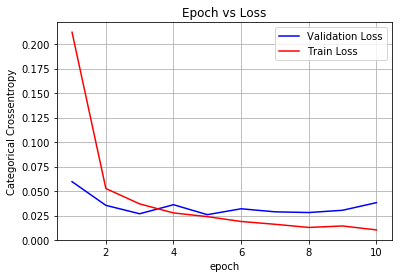

In [0]:
v_l_3, t_l_3 = plotting(history_3, 'loss')

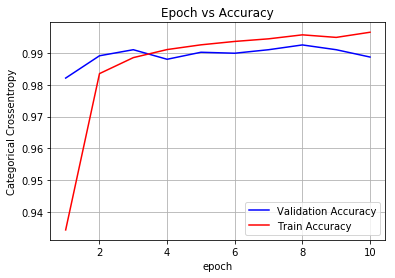

In [0]:
v_a_3, t_a_3 = plotting(history_3, 'acc')

In [0]:
va_l_3 = np.round(min(v_l_3), 3)
ta_l_3 = np.round(min(t_l_3),3)

print("Validation loss:", va_l_3)
print("Train loss:", ta_l_3, '\n')

print('*'*30, '\n')

va_a_3 = np.round(max(v_a_3),3)
ta_a_3 = np.round(max(t_a_3),3)

print("Validation accuracy:", va_a_3)
print("Train accuracy:", ta_a_3)

Validation loss: 0.026
Train loss: 0.01 

****************************** 

Validation accuracy: 0.992
Train accuracy: 0.996


In [0]:
# Architecture 5: Kernel size (5,5)

num_classes = 10
batch_size = 128
epochs = 10

# Initilizing Sequential model
model_5 = Sequential()

# Block 1
model_5.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', input_shape = input_shape))
model_5.add(Conv2D(32, (5, 5), activation='relu'))
model_5.add(MaxPooling2D(pool_size = (3, 3), strides = (2,2)))
model_5.add(Dropout(0.25))

# Block 2
model_5.add(Conv2D(64, (5, 5), activation='relu', padding = 'same'))
model_5.add(MaxPooling2D(pool_size = (3, 3), strides = (2,2)))
model_5.add(Dropout(0.25))

# Block 3
model_5.add(Conv2D(32, (5, 5), activation='relu', padding = 'same'))
model_5.add(MaxPooling2D(pool_size=(3, 3), strides = (2,2)))
model_5.add(Dropout(0.25))

# Flattening and dense
model_5.add(Flatten())
model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(num_classes, activation = 'softmax'))

# Compiling
model_5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
# Fit the model
history_5 = model_5.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

W0716 17:02:05.768578 139946237990784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 354s 6ms/step - loss: 0.5048 - acc: 0.8344 - val_loss: 0.0661 - val_acc: 0.9794
Epoch 2/10
60000/60000 [==============================] - 357s 6ms/step - loss: 0.1258 - acc: 0.9646 - val_loss: 0.0396 - val_acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0898 - acc: 0.9755 - val_loss: 0.0308 - val_acc: 0.9903
Epoch 4/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.0747 - acc: 0.9802 - val_loss: 0.0325 - val_acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0670 - acc: 0.9817 - val_loss: 0.0254 - val_acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.0613 - acc: 0.9823 - val_loss: 0.0258 - val_acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 354s 6ms/step - loss: 0.0551 - acc: 0.9852 - val_loss: 0.0244 - 

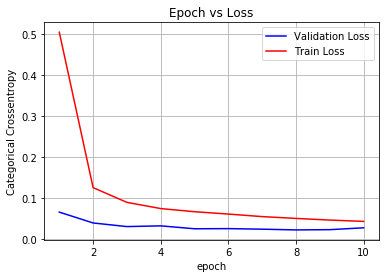

In [0]:
v_l_5, t_l_5 = plotting(history_5, 'loss')

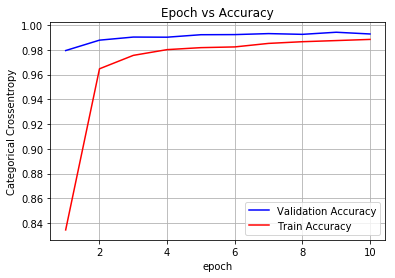

In [0]:
v_a_5, t_a_5 = plotting(history_5, 'acc')

In [0]:
va_l_5 = np.round(min(v_l_5), 3)
ta_l_5 = np.round(min(t_l_5),3)

print("Validation loss:", va_l_5)
print("Train loss:", ta_l_5, '\n')

print('*'*30, '\n')

va_a_5 = np.round(max(v_a_5),3)
ta_a_5 = np.round(max(t_a_5),3)

print("Validation accuracy:", va_a_5)
print("Train accuracy:", ta_a_5)

Validation loss: 0.023
Train loss: 0.043 

****************************** 

Validation accuracy: 0.994
Train accuracy: 0.988


In [14]:
# Architecture 9: Kernel size (9,9)

num_classes = 10
batch_size = 128
epochs = 10

# Initilizing Sequential model
model_9 = Sequential()

# Block 1
model_9.add(Conv2D(64, kernel_size = (9, 9), activation = 'relu', input_shape = input_shape))
model_9.add(Conv2D(32, (9, 9), activation='relu'))
model_9.add(BatchNormalization())
model_9.add(MaxPooling2D(pool_size = (4, 4), strides = (2,2)))
model_9.add(Dropout(0.5))

# Block 2
model_9.add(Conv2D(64, (9, 9), activation='relu', padding = 'same'))
model_9.add(BatchNormalization())
model_9.add(MaxPooling2D(pool_size = (4, 4), strides = (2,2)))
model_9.add(Dropout(0.5))

# Flattening and dense
model_9.add(Flatten())
model_9.add(Dense(128, activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.5))
model_9.add(Dense(num_classes, activation = 'softmax'))

# Compiling
model_9.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
# Fit the model
history_9 = model_9.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

W0717 06:20:15.154760 140379344217984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 06:20:15.213367 140379344217984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 06:20:15.222794 140379344217984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 06:20:15.303605 140379344217984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0717 06:20:15.305129 1403793442

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 409s 7ms/step - loss: 0.4876 - acc: 0.8522 - val_loss: 0.0877 - val_acc: 0.9731
Epoch 2/10
60000/60000 [==============================] - 407s 7ms/step - loss: 0.1097 - acc: 0.9701 - val_loss: 0.0350 - val_acc: 0.9892
Epoch 3/10
60000/60000 [==============================] - 407s 7ms/step - loss: 0.0751 - acc: 0.9797 - val_loss: 0.0600 - val_acc: 0.9816
Epoch 4/10
60000/60000 [==============================] - 407s 7ms/step - loss: 0.0659 - acc: 0.9822 - val_loss: 0.0334 - val_acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 408s 7ms/step - loss: 0.0545 - acc: 0.9852 - val_loss: 0.0386 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 408s 7ms/step - loss: 0.0476 - acc: 0.9868 - val_loss: 0.0288 - val_acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 408s 7ms/step - loss: 0.0447 - acc: 0.9878 - val_loss: 0.0276 - 

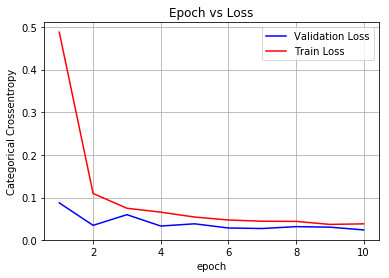

In [15]:
v_l_9, t_l_9 = plotting(history_9, 'loss')

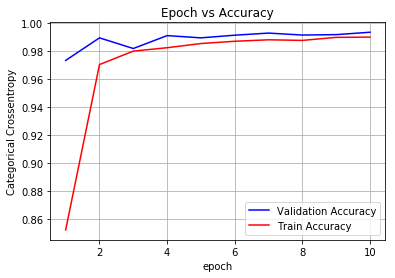

In [16]:
v_a_9, t_a_9 = plotting(history_9, 'acc')

In [17]:
va_l_9 = np.round(min(v_l_9), 3)
ta_l_9 = np.round(min(t_l_9),3)

print("Validation loss:", va_l_9)
print("Train loss:", ta_l_9, '\n')

print('*'*30, '\n')

va_a_9 = np.round(max(v_a_9),3)
ta_a_9 = np.round(max(t_a_9),3)

print("Validation accuracy:", va_a_9)
print("Train accuracy:", ta_a_9)

Validation loss: 0.024
Train loss: 0.037 

****************************** 

Validation accuracy: 0.993
Train accuracy: 0.99


In [24]:
from prettytable import PrettyTable

print('\n\n')
a = PrettyTable()
a.field_names = ['S.No', 'Kernel Size', 'Max Pooling', 'Strides', 'Test Loss', 'Test Accuracy']
a.add_row([1, '(3,3)', '(2,2)', '(2,2)', '0.026','0.992'])
print(a.get_string(title = "Architecture: 3,    Activation: relu,    Optimizer: adam"), '\n\n')


b = PrettyTable()
b.field_names = ['S.No', 'Kernel Size', 'Max Pooling', 'Strides', 'Drop Out', 'Test Loss', 'Test Accuracy']
b.add_row([1, '(5,5)', '(3,3)', '(2,2)', 0.5, '0.023', '0.994'])
print(b.get_string(title = "Architecture 5,  Activation: relu,  Optimizer: adam"), '\n\n')


c = PrettyTable()
c.field_names = ['S.No', 'Kernel Size', 'Max Pooling', 'Strides', 'Drop Out', 'Batch Normalization', 'Test Loss', 'Test Accuracy']
c.add_row([1, '(9,9)', '(4,4)', '(2,2)', 0.5, 'Applied', '0.024', '0.993'])
print(c.get_string(title = "Architecture 9,    Activation: relu,    Optimizer: adam"))




+------+-------------+-------------+---------+-----------+---------------+
| S.No | Kernel Size | Max Pooling | Strides | Test Loss | Test Accuracy |
+------+-------------+-------------+---------+-----------+---------------+
|  1   |    (3,3)    |    (2,2)    |  (2,2)  |   0.026   |     0.992     |
+------+-------------+-------------+---------+-----------+---------------+ 


+------+-------------+-------------+---------+----------+-----------+---------------+
| S.No | Kernel Size | Max Pooling | Strides | Drop Out | Test Loss | Test Accuracy |
+------+-------------+-------------+---------+----------+-----------+---------------+
|  1   |    (5,5)    |    (3,3)    |  (2,2)  |   0.5    |   0.023   |     0.994     |
+------+-------------+-------------+---------+----------+-----------+---------------+ 


+------+-------------+-------------+---------+----------+---------------------+-----------+---------------+
| S.No | Kernel Size | Max Pooling | Strides | Drop Out | Batch Normalization 